COMPARISION OF VARIOUS CLASSIFIER OF SUPERVISE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('car_evaluation.csv')

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
cols=['F1','F2','F3','F4','F5','F6','Target']

In [6]:
df.columns=cols

In [7]:
df.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'Target'], dtype='object')

In [8]:
df.shape

(1727, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   F1      1727 non-null   object
 1   F2      1727 non-null   object
 2   F3      1727 non-null   object
 3   F4      1727 non-null   object
 4   F5      1727 non-null   object
 5   F6      1727 non-null   object
 6   Target  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
Target    0
dtype: int64

In [11]:
df[df.duplicated()]

,F1,F2,F3,F4,F5,F6,Target


In [12]:
df.describe()

,F1,F2,F3,F4,F5,F6,Target
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [13]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['F1','F2','F3','F4','F5','F6','Target'])
df=encoder.fit_transform(df)

In [14]:
x=df.drop(['Target'],axis=1)
y=df['Target']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42,shuffle=True)

In [16]:
x_train.head()


,F1,F2,F3,F4,F5,F6
1412,4,2,1,2,1,3
756,2,4,1,1,1,1
589,2,2,2,3,2,2
906,3,1,2,2,3,1
1022,3,2,2,3,3,3


In [17]:
y_test.head()

599     1
932     1
628     1
1497    2
1262    1
Name: Target, dtype: int32

In [18]:
y_train.head()

1412    1
756     1
589     2
906     2
1022    1
Name: Target, dtype: int32

Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
reg=LogisticRegression()

In [21]:
reg.fit(x_train,y_train)

D:\User\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred1=reg.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
acc1=accuracy_score(y_test,y_pred1)
print(acc1)

0.7546296296296297


KNN Algorithm

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
classify1=KNeighborsClassifier(n_neighbors=7)

In [27]:
classify1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_pred2=classify1.predict(x_test)

In [29]:
acc2=accuracy_score(y_test,y_pred2)
print(acc2)

0.9050925925925926


Decision Tree ALGORITHM

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
classify2=DecisionTreeClassifier()

In [32]:
classify2.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred3=classify2.predict(x_test)

In [34]:
acc3=accuracy_score(y_test,y_pred3)
print(acc3)

0.9675925925925926


SVM Algorithm

In [35]:
from sklearn.svm import SVC

In [36]:
classify3=SVC()

In [37]:
classify3.fit(x_train,y_train)

SVC()

In [38]:
y_pred4=classify3.predict(x_test)

In [39]:
acc4=accuracy_score(y_test,y_pred4)
print(acc4)

0.9513888888888888


Naive Bayes Algorithm

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
classify4=GaussianNB()

In [42]:
classify4.fit(x_train,y_train)

GaussianNB()

In [43]:
y_pred5=classify4.predict(x_test)

In [44]:
acc5=accuracy_score(y_test,y_pred5)
print(acc5)

0.7013888888888888


The Accuracy score of Various Algorithm are:

        1) Logostic Regression = 75.43%
        
        2) KNN Algorithm = 90.51%
        
        3) Decision Tree Algorithm = 96.52%
        
        4) SVM Algorithm = 95.14%
        
        5) Naive Bayes Algorithm = 70.14%

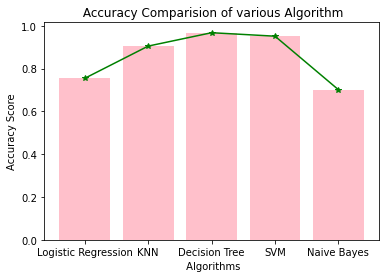

In [59]:
s=[acc1,acc2,acc3,acc4,acc5]
A=['Logistic Regression','KNN','Decision Tree','SVM','Naive Bayes']
plt.bar(A,s,color='pink')
plt.plot(A,s,color='green',marker='*')
plt.title(" Accuracy Comparision of various Algorithm")
plt.xlabel(' Algorithms')
plt.ylabel('Accuracy Score')
plt.show()

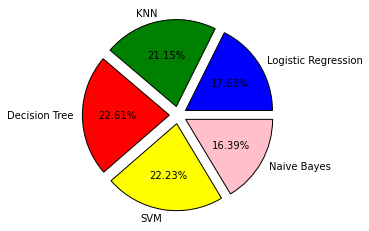

In [53]:
s=[acc1,acc2,acc3,acc4,acc5]
plt.pie(s,colors=['blue','green','red','yellow','pink'],explode=[.1,.1,.1,.1,.1],autopct='%1.2f%%',labels=['Logistic Regression','KNN','Decision Tree','SVM','Naive Bayes'],wedgeprops={'edgecolor':'black'})
plt.show()


In [54]:
plt.bar?